# **Data cleaning**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Attrition data (1).csv')

# Display the first few rows of the dataframe
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [ ]:
# Display basic information about the dataset
df.info()

# Display summary statistics
df.describe()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

(4410, 29)

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()
df.head()
df.shape

print(df.isnull().sum())

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64
EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
D

In [ ]:
# Convert Attrition to numerical
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert categorical variables using one-hot encoding
#df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'])

# **EDA**

Attrition Rate: 16.16%


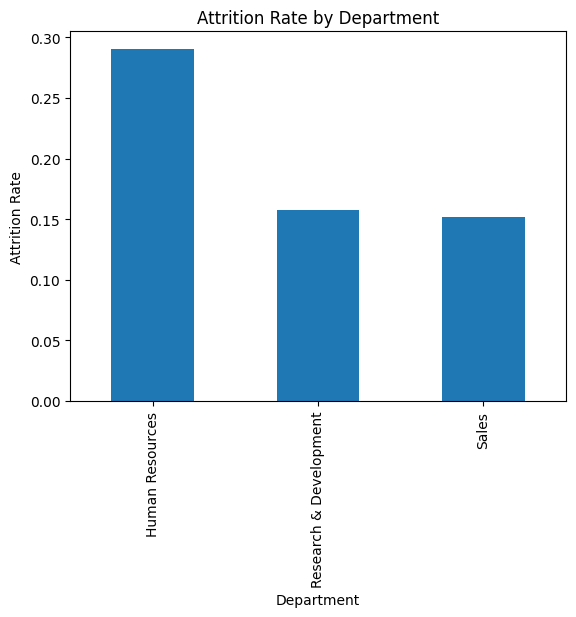

In [ ]:
# Attrition analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate attrition rate
attrition_rate = df['Attrition'].mean()
print(f'Attrition Rate: {attrition_rate * 100:.2f}%')

# Attrition rate by Department
attrition_by_dept = df.groupby('Department')['Attrition'].mean()
attrition_by_dept.plot(kind='bar')
plt.title('Attrition Rate by Department')
plt.ylabel('Attrition Rate')
plt.show()

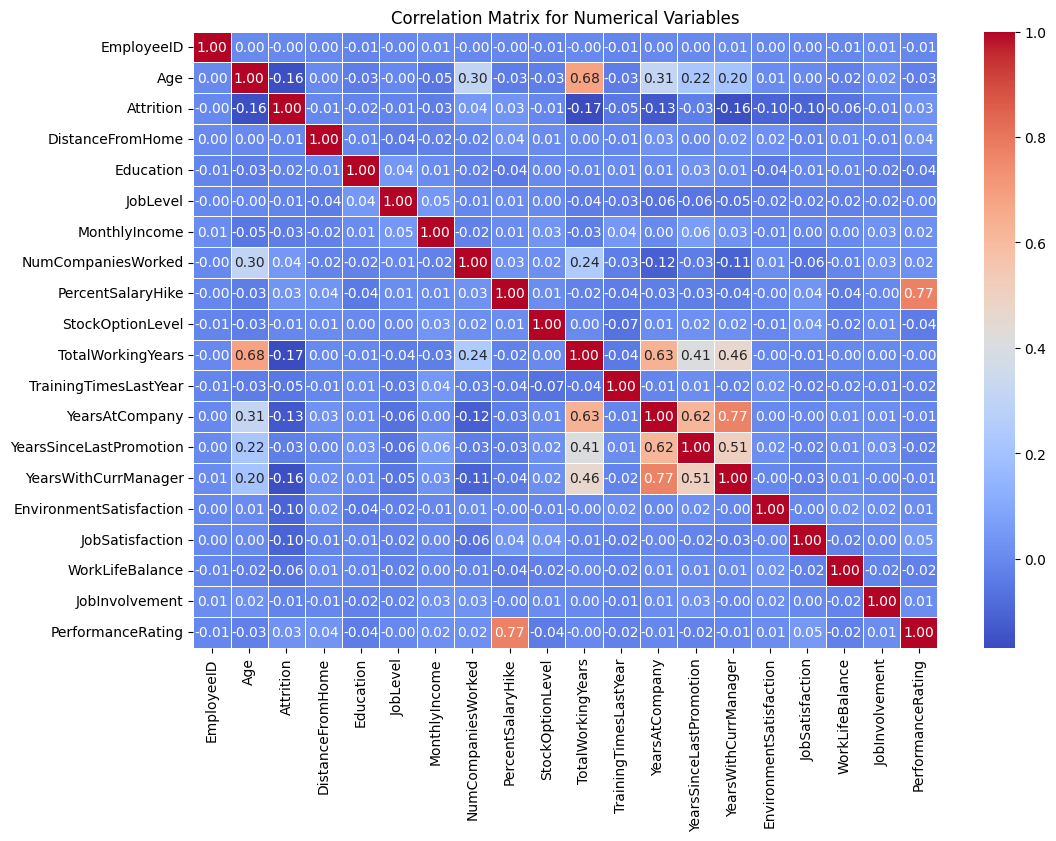

In [ ]:
# Correlation analysis

# Filter the dataframe to include only numerical variables
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Drop constant columns
numerical_df = numerical_df.loc[:, (numerical_df != numerical_df.iloc[0]).any()]

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

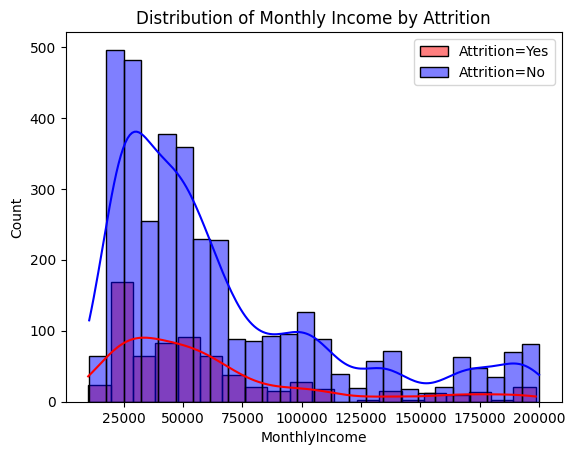

In [ ]:
# Feature distriburion

# Distribution of Monthly Income
sns.histplot(df[df['Attrition'] == 1]['MonthlyIncome'], kde=True, color='red', label='Attrition=Yes')
sns.histplot(df[df['Attrition'] == 0]['MonthlyIncome'], kde=True, color='blue', label='Attrition=No')
plt.legend()
plt.title('Distribution of Monthly Income by Attrition')
plt.show()

**Key Observations:**

**Income Distribution:** The distribution of monthly income for both groups appears to be right-skewed, indicating a larger concentration of employees with lower to moderate incomes.

**Potential Correlation:** There seems to be a possible correlation between higher income and lower attrition rates. The distribution for employees who stayed with the company tends to extend further into higher income brackets compared to those who left.



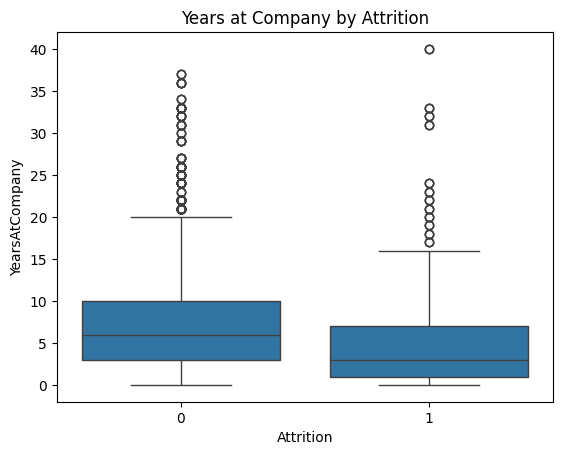

In [ ]:
# Boxplot of Years at Company
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title('Years at Company by Attrition')
plt.show()

**Key Observations:**

**Inverse Relationship:** There is an inverse relationship between years at a company and attrition rates. As the number of years increases, the likelihood of attrition decreases.

**Potential Factors:** This trend suggests that factors such as job satisfaction, career growth opportunities, and company loyalty might play a role in employee retention.

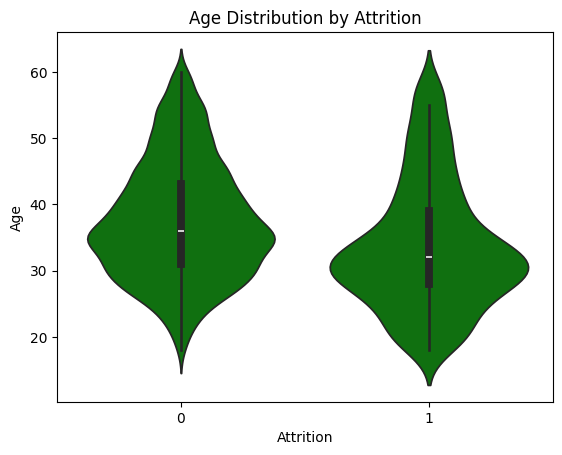

In [ ]:
# violin plot

# Violin plot of Age
sns.violinplot(x='Attrition', y='Age', data=df, color='green')
plt.title('Age Distribution by Attrition')
plt.show()

**Hypothesis testing**

**Key Observations:**

**Age Distribution:** The age distribution for both groups is right-skewed, indicating a larger concentration of younger employees.

**Potential Correlation:** There is a possible correlation between younger age and higher attrition rates, as suggested by the wider distribution of age for the "Attrition Yes" group.

In [ ]:
# T-tests

from scipy.stats import ttest_ind

# T-test for Monthly Income
t_stat, p_val = ttest_ind(df[df['Attrition'] == 1]['MonthlyIncome'], df[df['Attrition'] == 0]['MonthlyIncome'])
print(f'T-test for Monthly Income: t_stat={t_stat}, p_val={p_val}')

T-test for Monthly Income: t_stat=-2.1402419916639017, p_val=0.03239134262289243


**Interpretation**

* The t-statistic value indicates the difference between the means of the two groups (employees who left vs. employees who stayed) relative to the variability within the groups. A negative value suggests that the mean monthly income for employees who left is lower than those who stayed.
* P-value value is the probability of observing a difference in means as extreme as the one calculated, assuming there is no true difference between the populations (null hypothesis). A p-value less than the significance level (commonly 0.05) indicates that we reject the null hypothesis.

**Conclusion**
* Based on the t-test results, we can conclude that there is a statistically significant difference in monthly income between employees who left the company and those who stayed. The lower mean monthly income among employees who left suggests that income level might be a factor influencing attrition.

In [ ]:
# Chi-sq test

from scipy.stats import chi2_contingency

# Chi-Square test for Department
dept_table = pd.crosstab(df['Attrition'], df['Department'])
chi2, p, dof, ex = chi2_contingency(dept_table)
print(f'Chi-Square test for Department: chi2={chi2}, p_val={p}')

Chi-Square test for Department: chi2=24.025628066070787, p_val=6.065982503633906e-06


**Conclusion**
* Based on the chi-square test results, we can conclude that there is a significant association between department and attrition rate. This means that the distribution of attrition across departments is not random and that certain departments are more likely to experience higher attrition rates than others.

**Predictive modelling**

In [ ]:
print(df['Attrition'].value_counts())


Attrition
0    3605
1     695
Name: count, dtype: int64


Te dataset exhibits a class imbalance where one attribute it larger than other. this affects the ML models . so lets do visualization using Tableau
